In [ ]:
# pacotes básicos

import pandas as pd
import re, os
import numpy as np
from google.colab import drive
from google.colab import files
import pandas as pd
import re
import numpy as np
import nltk
from nltk.corpus import stopwords
import sys
!pip install jellyfish
import jellyfish
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MaxAbsScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import silhouette_score
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
import time
nltk.download('stopwords')
nltk.download('punkt')
drive.mount('/content/drive')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 132 kB 8.4 MB/s 
  Created wheel for jellyfish: filename=jellyfish-0.9.0-cp37-cp37m-linux_x86_64.whl size=73982 sha256=b5b65e8a29f625a0f687598e1d7ce3d709ba40055f805d307699add8619d5ca1
  Stored in directory: /root/.cache/pip/wheels/fe/99/4e/646ce766df0d070b0ef04db27aa11543e2767fda3075aec31b
Successfully built jellyfish


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Mounted at /content/drive


In [ ]:
planilha = pd.read_excel("/content/drive/My Drive/analise_textual/planilha_final.xlsx")

1 -Fazer a limpeza para trocar termos muito parecidos por termos únicos

In [ ]:

def limpar_semelhantes(variavel):
  pl_m = variavel
  rgx = re.compile("\[|\]|'")

  termos = []
  for item in pl_m:
    # print(item)
    # z= input("")
    item = re.sub(rgx,"", item)
    # print(item)
    # print(len(item))
    # z= input("")
    if len(item) > 0:
      item = item.split(",")
      # print(item)
      # z= input("")
      for it in item:
        if it.strip() not in termos:
          termos.append(it.strip())

  # print(termos)
  # print(len(termos))
  # # z = input("")


  dict_tm_pr =[]
  for r in range(len(termos)):
    c = "sim"
    if len(dict_tm_pr) == 0:
      dict_tm_pr.append(termos[r])
    else:
      for n in range(len(dict_tm_pr)):
        vlr = jellyfish.levenshtein_distance(termos[r].strip(), dict_tm_pr[n].strip())
        if 0 < vlr <= 2:
          # print(dict_tm_pr[n],termos[r])
          c = "não"
          break
          # z = input("")
      if c == "sim":
        dict_tm_pr.append(termos[r].strip())


  # print(len(dict_tm_pr))
  # print(dict_tm_pr)
  # z = input("")


  termos_lp = []
  for ite in pl_m:
    ite = re.sub(rgx,"", ite)
    # print(ite)
    if len(ite) == 0:
      list_tm_lp =[]
      termos_lp.append(list_tm_lp)
    else:
      ite = ite.split(",")
      list_tm_lp =[]
      for t in ite:
        for y in dict_tm_pr:
          v = jellyfish.levenshtein_distance(t.strip(), y.strip())
          if v == 0:
            list_tm_lp.append(t.strip())
          elif 0 < v <= 2:
            # print("trocou o" ,t , "pelo",y)
            if y.strip() not in list_tm_lp and "imovel" not in t:  
              list_tm_lp.append(y.strip())
      # print(list_tm_lp)
      termos_lp.append(list_tm_lp)
      # print(termos_lp)
      # z = input("")
  return termos_lp
  

  # print(planilha["medidas_judiciais"])


In [ ]:
lista_var = [planilha["medidas_judiciais"],planilha["tipo_acao"],planilha["assuntos_2"],planilha["tipo_acao"]]

termos_fn = []
for var in lista_var:
  termos_lp = limpar_semelhantes(var)
  termos_fn.append(termos_lp)


planilha["medidas_judiciais"] = termos_fn[0]
planilha["tipo_acao"] =  termos_fn[1]
planilha["assuntos_2"] = termos_fn[2]
planilha["tipo_acao"] = termos_fn[3]


2 - Mapeando a frequencias dos órgãos de cooperação

In [ ]:
rgx_org =  re.compile("jucesp|receita federal|coaf|banco central|bacen|drci|policia civil|tcu|tribunal de contas|policia federal|conselho de controle de atividades financeiras")

orgaos = []
qtde_org_c = []
for f in range(len(planilha)):
  org_prov = []
  # print("estamos no", f)
  tex = planilha.iloc[f,1]
  tex = re.sub("[^\w]|\d|,|_"," ",tex)
  text = [tex]
  bag_of_words_transformer = CountVectorizer(ngram_range=(1,5), strip_accents= "unicode")
  mx = bag_of_words_transformer.fit_transform(text).todense()
  terms = bag_of_words_transformer.get_feature_names_out()
  for tm in terms:
    if re.search(rgx_org,tm):
      tm_rgx = re.search(rgx_org,tm).group()
      if "tcu" in tm_rgx:
        tm_rgx = tm_rgx.replace("tcu","tribunal de contas")
        if tm_rgx not in org_prov:
          org_prov.append(tm_rgx)
      elif "bacen"in tm_rgx:
        tm_rgx = tm_rgx.replace("bacen","banco central")
        if tm_rgx not in org_prov:
          org_prov.append(tm_rgx)
      else:
        if tm_rgx not in org_prov:
          org_prov.append(tm_rgx)
  qtde_org_c.append(len(org_prov))
  orgaos.append(org_prov)

planilha["orgaos"] = orgaos
planilha["qtdade_orgaos"] = qtde_org_c

# print(planilha["orgaos"])

funções pra gerar os nós e as arestas

In [ ]:
def gera_nos(variavel):
  rgx = re.compile("\[|\]|'")
  lista_unicos= []
  lista_termos = variavel.to_list()
  for item in lista_termos:
    item = re.sub(rgx,"", str(item))
    itens = item.split(",")
    for it in itens:
     if it.strip() not in lista_unicos:
        lista_unicos.append(it.strip())
  
  ids = []
  for k in range(len(lista_unicos)):
    ids.append(k)

  lista_nos = pd.DataFrame()
  lista_nos["Label"] = lista_unicos
  lista_nos["Id"] = ids

  print(lista_nos)

  return lista_nos,lista_unicos,ids


########################################

def gera_relacoes(lista_unicos, ids,variavel):

  variavel = variavel.reset_index()
  print(variavel)
  z= input('')
  rgx = re.compile("\[|\]|'")
  dict_ids = {}
  for id,lb in zip(ids, lista_unicos):
    dict_ids[lb]= id
  

  print(dict_ids)


  source =[]
  target = []


  for n in range(len(variavel)):
    text_str = variavel.iloc[n,1]
    item = re.sub(rgx,"", str(text_str))
    sublist = item.split(",")

    for d in range(len(sublist)):
      # print(sublist[d].strip())
      # z= input("")
      id_source = dict_ids[sublist[d].strip()]
      if d == len(sublist)-1:
        pass
      else:
        for e in range(d+1, len(sublist)):
          source.append(id_source)
          id_target = dict_ids[sublist[e].strip()]
          target.append(id_target)
        # print(source)
        # print(target)
        # z = input("")

  relacoes = pd.DataFrame()

  relacoes["Source"] = source
  relacoes["Target"] = target
  relacoes["Type"] = "Directed"
    
  # print(relacoes)
  return relacoes

  

separar só as publicações com mais de um órgão de controle e gerar o insumo da analise de redes delas

In [ ]:
df_filter = planilha["qtdade_orgaos"] > 1
planilha_nos_org = planilha[df_filter]

# planilha_nos_org["orgaos"] = planilha_nos_org["orgaos"].astype(str).str.replace("tcu","tribunal de contas")
# planilha_nos_org["orgaos"] = planilha_nos_org["orgaos"].astype(str).str.replace("bacen","banco central")

lista_nos, lista_unicos,ids = gera_nos(planilha_nos_org["orgaos"])


lista_nos.to_csv("lista_nos_orgaos.csv", index= False, encoding= 'utf-8')
files.download('lista_nos_orgaos.csv')


relacoes_org = gera_relacoes(lista_unicos, ids, planilha_nos_org["orgaos"])


relacoes_org.to_csv("relacoes_org.csv", index= False)
files.download("relacoes_org.csv")

                Label  Id
0       banco central   0
1       policia civil   1
2  tribunal de contas   2
3                coaf   3
4     receita federal   4
5     policia federal   5
6              jucesp   6


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

     index                                             orgaos
0       26                     [banco central, policia civil]
1       71                     [policia civil, banco central]
2      532                [tribunal de contas, banco central]
3      621                [tribunal de contas, policia civil]
4      629                [banco central, tribunal de contas]
..     ...                                                ...
185  45689                [banco central, tribunal de contas]
186  45729              [tribunal de contas, policia federal]
187  45739  [tribunal de contas, receita federal, policia ...
188  45781                 [receita federal, policia federal]
189  45820                 [receita federal, policia federal]

[190 rows x 2 columns]

{'banco central': 0, 'policia civil': 1, 'tribunal de contas': 2, 'coaf': 3, 'receita federal': 4, 'policia federal': 5, 'jucesp': 6}


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
rgx = re.compile("\[|\]|'")

df_orgaos = pd.DataFrame()
df_qtdade = pd.DataFrame()
org = []
f = 0
qtdade = []
for item in planilha["orgaos"]:
  item = re.sub(rgx,"", str(item))
  if len(item) > 0:
    f = f+1
    # print(item)
    itens = item.split(",")
    # print(len(itens))
    if len(itens) > 1:
      qtdade.append(len(itens))
      for it in itens:
        org.append(it.strip())
    else:
      qtdade.append(1)
      org.append(item.strip())

    

print(f)
print("o percentual é:",(f*100)/len(planilha["orgaos"]))
df_orgaos["org"] = org
df_qtdade["qtdade"] = qtdade


df_orgaos["org"] = np.where(df_orgaos["org"] == "tcu", "tribunal de contas",df_orgaos["org"])
df_orgaos["org"] = np.where(df_orgaos["org"] == "bacen", "banco central",df_orgaos["org"])

print(df_orgaos["org"].value_counts())

print("-"*20)

print(df_qtdade["qtdade"].value_counts())


var_org = df_orgaos["org"].value_counts().to_frame()
var_org.to_excel("var_org.xlsx")
files.download('var_org.xlsx')


2049
o percentual é: 4.465608926859036
tribunal de contas    955
banco central         590
receita federal       289
policia federal       171
policia civil         136
jucesp                100
coaf                   13
drci                    2
Name: org, dtype: int64
--------------------
1    1859
2     174
3      15
4       1
Name: qtdade, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# rgx_org =  re.compile("receita federal|coaf|banco central|drci|policia civil|tcu|tribunal de contas|policia federal|conselho de controle de atividades financeiras|polícia federal|polícia civil")
# orgaos = []
# for f in range(len(planilha)):
#   org_prov = []
#   # print("estamos no", f)
#   tex = planilha.iloc[f,1]
#   tex = tex.lower()

#   if re.search(rgx_org,tex):
#       tm_rgx = re.search(rgx_org,tex).group()
#       if tm_rgx not in org_prov:
#         org_prov.append(tm_rgx)
#   orgaos.append(org_prov)

# print(len(orgaos))
# planilha["orgaos_2"] = orgaos

In [ ]:
# df_orgaos = pd.DataFrame()


# org = []
# f = 0
# for item in planilha["orgaos_2"]:
#   item = re.sub(rgx,"", str(item))
#   if len(item) > 0:
#     f = f+1
#     # print(item)
#     item = item.split(",")
#     for it in item:
#       org.append(it.strip())

# print(f)
# print("o percentual é:",(f*100)/len(planilha["orgaos_2"]))
# df_orgaos["org"] = org

# df_orgaos["org"] = np.where(df_orgaos["org"] == "tcu", "tribunal de contas",df_orgaos["org"])

# df_orgaos["org"].value_counts()

Ou seja, o regex tem um desempenho pior do que o bag of words...
FAZER A ANÁLISE DE REDES DOS ORGÃOS

Repetindo os procedimentos para os instrumentos utilizados pelos juízes

In [ ]:
rgx_inst =  re.compile("rif|pericia|sisbajud|bacenjud|infojud|drci|renajud|srei|ccs|sinesp|infoseg|lab-ld|laudo(s)")

instrum = []
qtde_inst_c = []
for f in range(len(planilha)):
  inst_prov = []
  # print("estamos no", f)
  tex = planilha.iloc[f,1]
  tex = re.sub("[^\w]|\d|,|_"," ",tex)
  text = [tex]
  bag_of_words_transformer = CountVectorizer(ngram_range=(1,3), strip_accents= "unicode")
  mx = bag_of_words_transformer.fit_transform(text).todense()
  terms = bag_of_words_transformer.get_feature_names_out()
  for tm in terms:
    if re.search(rgx_inst,tm):
      tm_rgx = re.search(rgx_inst,tm).group()
      if tm_rgx not in inst_prov:
        inst_prov.append(tm_rgx)
  qtde_inst_c.append(len(inst_prov))
  instrum.append(inst_prov)

planilha["instrumentos"] = instrum
planilha["qtdade_instrumentos"] = qtde_inst_c

analise de redes dos instrumentos

In [ ]:
df_filter = planilha["qtdade_instrumentos"] > 1
planilha_nos_inst = planilha[df_filter]

lista_nos, lista_unicos,ids = gera_nos(planilha_nos_inst["instrumentos"])


# lista_nos.to_csv("lista_nos_instrumentos.csv", index= False, encoding= 'utf-8')
# files.download('lista_nos_instrumentos.csv')


relacoes_inst = gera_relacoes(lista_unicos, ids, planilha_nos_inst["instrumentos"])


# relacoes_inst.to_csv("relacoes_inst.csv", index= False)
# files.download("relacoes_inst.csv")

       Label  Id
0        rif   0
1    pericia   1
2    infojud   2
3   bacenjud   3
4     laudos   4
5    renajud   5
6    infoseg   6
7   sisbajud   7
8        ccs   8
9       drci   9
10      srei  10
      index                           instrumentos
0        17                         [rif, pericia]
1        23                         [rif, pericia]
2        26               [infojud, bacenjud, rif]
3        37             [pericia, infojud, laudos]
4        52  [bacenjud, pericia, infojud, renajud]
...     ...                                    ...
1086  45729                 [pericia, rif, laudos]
1087  45730                         [rif, pericia]
1088  45739                 [pericia, rif, laudos]
1089  45740                         [rif, pericia]
1090  45823                         [pericia, rif]

[1091 rows x 2 columns]

{'rif': 0, 'pericia': 1, 'infojud': 2, 'bacenjud': 3, 'laudos': 4, 'renajud': 5, 'infoseg': 6, 'sisbajud': 7, 'ccs': 8, 'drci': 9, 'srei': 10}


agora a análise de redes entre os instumentos e os órgãos de cooperação

In [ ]:
df_filter_1 = planilha["qtdade_orgaos"] > 0
planilha_nos_org_b = planilha[df_filter_1]

# print(planilha_nos_org_b)

df_filter_2 = planilha_nos_org_b["qtdade_instrumentos"] > 0
planilha_nos_inst_b = planilha_nos_org_b[df_filter_2]

# filtradas as planilhas agora preciso juntar as strings das duas variáveis

planilha_nos_inst_b["unif_org_inst"] = planilha_nos_inst_b["orgaos"].astype(str)+"___"+planilha_nos_inst_b["instrumentos"].astype(str)

planilha_nos_inst_b["unif_org_inst"] = planilha_nos_inst_b["unif_org_inst"].astype(str).str.replace("\]___\[", ",").str.strip()

# planilha_nos_inst_b["unif_org_inst"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


gerar agora os dados dos orgaos por Estado

In [ ]:
planilha_nos_org_b ["tribunal"] = np.where(planilha_nos_org_b["tribunal"].isnull() == True, "TJ"+planilha_nos_org_b["estado"].str[:],planilha_nos_org_b['tribunal'])


rgx = re.compile("\[|\]|'")

df_orgaos_est = pd.DataFrame()
df_est = pd.DataFrame()
org_b = []
est = []
for og,et in zip(planilha_nos_org_b["orgaos"],planilha_nos_org_b["tribunal"]):
  item = re.sub(rgx,"", str(og))
  itens = item.split(",")
  for it in itens:
    org_b.append(it.strip())
    est.append(et)

df_orgaos_est["org"] = org_b
df_est["est"] = est


# print(df_orgaos_est["org"].value_counts())

# print("-"*20)

# print(df_est["est"].value_counts())

df_unif = pd.concat([df_orgaos_est,df_est], axis=1,ignore_index = True)
unif_classes = pd.DataFrame(df_unif.groupby([1,0])[0].count())
unif_classes.columns =["Quantidade"]
unif_classes = unif_classes.reset_index()
unif_classes

unif_classes.to_excel("unif_classes_org.xlsx", index= False)
files.download("unif_classes_org.xlsx")


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

agora gerar os nos dessa parte unificada

In [ ]:
lista_nos, lista_unicos,ids = gera_nos(planilha_nos_inst_b["unif_org_inst"])


lista_nos.to_csv("lista_nos_instrumentos_orgaos.csv", index= False, encoding= 'utf-8')
files.download('lista_nos_instrumentos_orgaos.csv')


relacoes_inst = gera_relacoes(lista_unicos, ids, planilha_nos_inst_b["unif_org_inst"])


relacoes_inst.to_csv("relacoes_inst_org.csv", index= False)
files.download("relacoes_inst_org.csv")

                 Label  Id
0        banco central   0
1        policia civil   1
2              infojud   2
3             bacenjud   3
4                  rif   4
5      receita federal   5
6              pericia   6
7               laudos   7
8              renajud   8
9      policia federal   9
10  tribunal de contas  10
11                coaf  11
12            sisbajud  12
13                 ccs  13
14                drci  14
15             infoseg  15
16              jucesp  16
17                srei  17


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

      index                                      unif_org_inst
0        26  ['banco central', 'policia civil','infojud', '...
1        37  ['receita federal','pericia', 'infojud', 'laud...
2        52  ['banco central','bacenjud', 'pericia', 'infoj...
3        69  ['receita federal','pericia', 'infojud', 'laud...
4        71      ['policia civil', 'banco central','bacenjud']
...     ...                                                ...
1229  45776                          ['receita federal','rif']
1230  45795                          ['receita federal','rif']
1231  45801                            ['banco central','rif']
1232  45820       ['receita federal', 'policia federal','rif']
1233  45877                          ['policia federal','rif']

[1234 rows x 2 columns]

{'banco central': 0, 'policia civil': 1, 'infojud': 2, 'bacenjud': 3, 'rif': 4, 'receita federal': 5, 'pericia': 6, 'laudos': 7, 'renajud': 8, 'policia federal': 9, 'tribunal de contas': 10, 'coaf': 11, 'sisbajud': 12,

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
rgx = re.compile("\[|\]|'")
df_instr = pd.DataFrame()
df_qtdade_instr = pd.DataFrame()
inst = []
f = 0
qtdade = []
for item in planilha["instrumentos"]:
  item = re.sub(rgx,"", str(item))
  if len(item) > 0:
    f = f+1
    # print(item)
    itens = item.split(",")
    # print(len(itens))
    if len(itens) > 1:
      qtdade.append(len(itens))
      for it in itens:
        inst.append(it.strip())
    else:
      qtdade.append(1)
      inst.append(item.strip())

    

print(f)
print("o percentual é:",(f*100)/len(planilha["instrumentos"]))
df_instr["instrumentos"] = inst
df_qtdade_instr["qtdade"] = qtdade


# df_orgaos["org"] = np.where(df_orgaos["org"] == "tcu", "tribunal de contas",df_orgaos["org"])

print(df_instr["instrumentos"].value_counts())

print("-"*20)

print(df_qtdade_instr["qtdade"].value_counts())


var_inst = df_instr["instrumentos"].value_counts().to_frame()
var_inst.to_excel("var_inst.xlsx")
files.download('var_inst.xlsx')

7116
o percentual é: 15.50867404759829
rif         5685
pericia     1571
renajud      440
bacenjud     399
laudos       167
infojud      117
sisbajud      57
infoseg       15
ccs           11
drci           2
srei           1
Name: instrumentos, dtype: int64
--------------------
1    6025
2     872
3     188
4      24
5       6
6       1
Name: qtdade, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

agora chegou a vez das medidas. Primeiro temos que eliminar das medidas todas as que sejam também instrumentos ou órgãos.

In [ ]:
var_inst = df_instr["instrumentos"].value_counts().to_frame()
var_org = df_orgaos["org"].value_counts().to_frame()

# print(var_inst.index.values)

l_1 = var_inst.index.values.tolist()
l_2 = var_org.index.values.tolist()

control = l_1 + l_2
aux =  ["edital","edital de intimacao","laudo de exame","sistema bacenjud","laudo pericial","homologacao","bacenjud","bacen","jucesp","decreto prisional"]
control = control + aux
# print(control)

medidas_lp = []
for item in planilha["medidas_judiciais"]:
  item = re.sub(rgx,"", str(item))
  list_sub_lp = []
  if len(item) > 0:
    itens = item.split(",")
    for it in itens:
      if it.strip() not in control:
        if it.strip() == "decretar indisponibilidade" or it.strip() == "decreto de indisponibilidade" or it.strip() == "medida de indisponibilidade":
          it = "decretacao de indisponibilidade"
        elif it.strip() == "interceptacoes":
          it = "interceptacao"
        elif it.strip() == "interceptacoes telefonicas":
          it = "interceptacao telefonica"
        list_sub_lp.append(it)
  medidas_lp.append(list_sub_lp)


planilha["medidas_judiciais"] = medidas_lp 


Agora precisamos gerar as frequencias das medidas tbem. Igual das outras

In [ ]:

df_medid = pd.DataFrame()
df_qtdade_medid = pd.DataFrame()
medid = []
f = 0
qtdade = []
for item in planilha["medidas_judiciais"]:
  item = re.sub(rgx,"", str(item))
  if len(item) > 0:
    f = f+1
    # print(item)
    itens = item.split(",")
    # print(len(itens))
    if len(itens) > 1:
      qtdade.append(len(itens))
      for it in itens:
        medid.append(it.strip())
    else:
      qtdade.append(1)
      medid.append(item.strip())

    

print(f)
print("o percentual é:",(f*100)/len(planilha["medidas_judiciais"]))
df_medid["medidas"] = medid
df_qtdade_medid["qtdade"] = qtdade


print(df_medid["medidas"].value_counts())

print("-"*20)

print(df_qtdade_medid["qtdade"].value_counts())


var_med = df_medid["medidas"].value_counts().to_frame()
var_med.to_excel("var_med.xlsx")
files.download('var_med.xlsx')

8755
o percentual é: 19.08072530729666
decretacao de indisponibilidade    1740
prisao preventiva                  1376
medida cautelar                     926
inquerito civil                     832
interrogatorio                      783
inquerito policial                  751
apreensao                           721
extincao da punibilidade            699
antecipacao da tutela               608
desbloqueio                         573
medida liminar                      508
prisao em flagrante                 452
interceptacao                       389
liberdade provisoria                380
mandado de prisao                   366
antecipado da lide                  361
interceptacao telefonica            348
prisao cautelar                     323
bloqueio de bens                    319
suspensao do processo               319
trancamento da acao                 316
sequestro                           311
busca apreensao                     308
suspensao condicional               290
d

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Gerar essas medidas tbem em função dos Estados

In [ ]:
lista_nos, lista_unicos,ids = gera_nos(planilha["medidas_judiciais"])


lista_nos.to_csv("lista_nos_medidas.csv", index= False, encoding= 'utf-8')
files.download('lista_nos_medidas.csv')


relacoes_inst = gera_relacoes(lista_unicos, ids, planilha["medidas_judiciais"])


relacoes_inst.to_csv("relacoes_medidas.csv", index= False)
files.download("relacoes_medidas.csv")

                              Label  Id
0                                     0
1                 prisao preventiva   1
2             antecipacao da tutela   2
3   decretacao de indisponibilidade   3
4                         apreensao   4
5                     interceptacao   5
6          interceptacao telefonica   6
7                    interrogatorio   7
8                    medida liminar   8
9          extincao da punibilidade   9
10               inquerito policial  10
11                 bens apreendidos  11
12             liberdade provisoria  12
13                  medida cautelar  13
14                  prisao cautelar  14
15                  inquerito civil  15
16             afastamento cautelar  16
17              trancamento da acao  17
18                tutela provisoria  18
19               antecipado da lide  19
20                mandado de prisao  20
21            relaxamento de prisao  21
22            suspensao condicional  22
23             extincao do processo  23


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

       index        medidas_judiciais
0          0                       []
1          1                       []
2          2      [prisao preventiva]
3          3                       []
4          4  [antecipacao da tutela]
...      ...                      ...
45879  45879                       []
45880  45880                       []
45881  45881         [interrogatorio]
45882  45882         [interrogatorio]
45883  45883                       []

[45884 rows x 2 columns]

{'': 0, 'prisao preventiva': 1, 'antecipacao da tutela': 2, 'decretacao de indisponibilidade': 3, 'apreensao': 4, 'interceptacao': 5, 'interceptacao telefonica': 6, 'interrogatorio': 7, 'medida liminar': 8, 'extincao da punibilidade': 9, 'inquerito policial': 10, 'bens apreendidos': 11, 'liberdade provisoria': 12, 'medida cautelar': 13, 'prisao cautelar': 14, 'inquerito civil': 15, 'afastamento cautelar': 16, 'trancamento da acao': 17, 'tutela provisoria': 18, 'antecipado da lide': 19, 'mandado de prisao': 20, '

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

agora analisar a frequência dos tipos processuais

In [ ]:
df_tipo = pd.DataFrame()
df_qtdade_tipo = pd.DataFrame()
tipo = []
f = 0
qtdade = []




for item in planilha["tipo_acao"]:
  item = re.sub(rgx,"", str(item))
  if len(item) > 0:
    f = f+1
    # print(item)
    itens = item.split(",")
    # print(len(itens))
    if len(itens) > 1:
      qtdade.append(len(itens))
      for it in itens:
        if it.strip() == "medidas cautelares":
          it = "acao cautelar"
        elif it.strip() == "recursos especiais":
          it = "recurso especial"
        elif it.strip() == "apelacoes":
          it = "apelacao"
        elif it.strip() == "acoes penais":
          it = "acao penal"
        elif it.strip() == "apelacoes civeis":
          it = "apelacao civel"
        elif it.strip() == "acoes civis":
          it = "acao civil"
        elif it.strip() == "acoes de improbidade":
          it = "acao de improbidade"
        elif it.strip() == "acoes de ressarcimento":
          it = "acao de ressarcimento"
        elif it.strip() == "execucoes penais":
          it = "execucao penal"
        elif it.strip() == "execucoes criminais":
          it = "execucao penal"
        elif it.strip() == "cautelares":
          it = "acao cautelar"
        tipo.append(it.strip())
    else:
      qtdade.append(1)
      if item.strip() == "medidas cautelares":
        item = "acao cautelar"
      elif item.strip() == "recursos especiais":
        item = "recurso especial"
      elif item.strip() == "apelacoes":
        item = "apelacao"
      elif item.strip() == "acoes penais":
        item = "acao penal"
      elif item.strip() == "apelacoes civeis":
        item = "apelacao civel"
      elif item.strip() == "acoes civis":
        item = "acao civil"
      elif item.strip() == "acoes de improbidade":
        item = "acao de improbidade"
      elif item.strip() == "acoes de ressarcimento":
        item = "acao de ressarcimento"
      elif item.strip() == "execucoes penais":
        item = "execucao penal"
      elif item.strip() == "execucoes criminais":
        item = "execucao penal"
      elif item.strip() == "cautelares":
          item = "acao cautelar"
      tipo.append(item.strip())

    

print(f)
print("o percentual é:",(f*100)/len(planilha["tipo_acao"]))
df_tipo["tipo"] = tipo
df_qtdade_tipo["qtdade_tipo"] = qtdade


print(df_tipo["tipo"].value_counts())

print("-"*20)

print(df_qtdade_tipo["qtdade_tipo"].value_counts())


var_tipo = df_tipo["tipo"].value_counts().to_frame()
var_tipo.to_excel("var_tipo.xlsx")
files.download('var_tipo.xlsx')

In [ ]:
def gera_dict_trm(lista):
  list_unifica = {}
  for i in lista:
      if i in list_unifica:# and i != "acao civil":
        vl = list_unifica[i]
        list_unifica[i] = vl+1
      else:
        # if i != "acao civil":
        list_unifica[i] = 1
  return list_unifica

##########################

def nuvem_palavras(dict_d):
    fig, ax1 = plt.subplots(sharex=True, sharey=True, figsize=(12,6))
    # wc = WordCloud(background_color="white",random_state=80, width=2000, height=1500) # ajuste dos tipos proessuais
    wc = WordCloud(max_font_size=40,random_state=42, background_color="white")#background_color="white",random_state=30, width=2000, height=900) # ajuste dos assuntos
    # wc = WordCloud(background_color="white",random_state=80, width=1500, height=600)
    wc.generate_from_frequencies(dict_d) #ajuste do tamanho das palavras
    ax1.imshow(wc, interpolation="bilinear")
    # ax1.imshow(wc)
    ax1.set_axis_off()

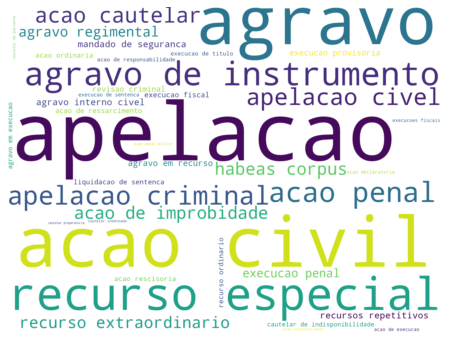

In [ ]:
dict_tipo = gera_dict_trm(tipo)
nuvem_palavras(dict_tipo)

Agora os assuntos

In [ ]:
rgx_1 = re.compile("atos de improbidade|atos improbos|pratica de improbidade|administrativo improbidade|assunto improbidade administrativa|conduta improba|civel assunto improbidade")
rgx_2 =  re.compile("creditos|divida ativa|exercicio financeiro|contribuinte de direito|isencao|correcao monetaria|arrecadacao|tributaria|contra ordem tributaria|credito tributario|debito tributario|sonegacao fiscal|debito fiscal|inadimplemento tributario|pagamento de tributos|crime de sonegacao")
rgx_3 = re.compile("indenizacao por dano|multa civil|pagamento de multa|civel indenizacao|prestacao pecuniaria|indenizacao")
rgx_4 = re.compile("sigilo bancario|sigilo|bancarias|conta bancaria|extratos|bancario fiscal")
rgx_5 = re.compile("apropriacao de imposto|apropriacao indebita|enriquecimento ilicito|vantagem ilicita")
rgx_6 = re.compile("trafico de drogas|entorpecente|trafico de entorpecentes|ilicito de entorpecentes|delito de trafico|penal trafico")
rgx_7 = re.compile("recursos federais|recursos publicos|prestacao de contas|ressarcimento ao erario|ressarcimento de danos|lesao ao erario|lesao ao patrimonio|danos ao erario|patrimonio publico|dinheiro publico|protecao do patrimonio|contas de gestao")
rgx_8 = re.compile("corrupcao ativa|crime de corrupcao|delito de corrupcao")
rgx_9 = re.compile("remuneracao|adicional de tempo|adicional por tempo|cargo de prefeito|exercicio do mandato|cargo de vereador|irredutibilidade da remuneracao|aposentadoria|nomeacao|cargo publico|servico publico|cargo em comissao|valor da remuneracao|exoneracao|exercicio do cargo|exame de admissibilidade|nomeacoes|cargo comissionado|cobranca servidor|irredutibilidade salarial|reintegracao|estatuto dos servidores|pagamento do adicional")
rgx_10 = re.compile("comissao de licitacao|procedimento licitatorio|dispensa de licitacao|contrato administrativo|inexigibilidade de licitacao|processos licitatorios|dispensa ou inexigibilidade")
rgx_11 = re.compile("lavagem ou ocultacao|lavagem de dinheiro|dilapidacao do patrimonio|dilapidacao patrimonial")
rgx_12 = re.compile("empreendimentos imobiliarios|contribuicao social|pagamento de honorarios|alimentar|alienacao fiduciaria|consumidor|contrato social|personalidade juridica|gestao da empresa|danos materiais|bens moveis|bens direitos|bens valores|incorporacao|credito financiamento")
rgx_13 = re.compile("procedimento investigatorio|procedimento administrativo|moralidade administrativa|atos administrativos")
rgx_14 = re.compile("crimes de responsabilidade|crime de peculato|prevaricacao|assunto peculato crimes|assunto concussao crimes")
rgx_15 = re.compile("falsificacao de documento|falsidade|falsificacao|dados falsos|estelionato")
rgx_16 = re.compile("ilegitimidade passiva|ilegitimidade ativa")
rgx_17 = re.compile("responsabilidade civil|responsabilidade penal")
rgx_18 = re.compile("organizacao criminosa|associacao criminosa")
rgx_19 = re.compile("reincidencia|reiteracao delitiva|reiteracao criminosa")
rgx_20 = re.compile("coacao ilegal|coacao|constrangimento ilegal")
rgx_21 = re.compile("prestacao de servicos|pratica do crime|pratica do delito|crimes praticados|conduta dolosa|pratica delitiva|conduta ilicita|pratica delituosa|crimes do sistema|condutas criminosas|assunto acao penal")
rgx_22 = re.compile("homicidio qualificado|assunto homicidio qualificado")

planilha["assuntos_2"] = planilha["assuntos_2"].astype(str).str.replace(rgx_1,"improbidade administrativa", regex = True)
planilha["assuntos_2"] = planilha["assuntos_2"].astype(str).str.replace(rgx_2,"tributario", regex = True)
planilha["assuntos_2"] = planilha["assuntos_2"].astype(str).str.replace(rgx_3,"indenizacao ou multa", regex = True)
planilha["assuntos_2"] = planilha["assuntos_2"].astype(str).str.replace(rgx_4,"sigilo bancario", regex = True)
planilha["assuntos_2"] = planilha["assuntos_2"].astype(str).str.replace(rgx_5,"enriquecimento ilicito", regex = True)
planilha["assuntos_2"] = planilha["assuntos_2"].astype(str).str.replace(rgx_6,"trafico de drogas", regex = True)
planilha["assuntos_2"] = planilha["assuntos_2"].astype(str).str.replace(rgx_7,"lesao ao erario", regex = True)
planilha["assuntos_2"] = planilha["assuntos_2"].astype(str).str.replace(rgx_8,"corrupcao", regex = True)
planilha["assuntos_2"] = planilha["assuntos_2"].astype(str).str.replace(rgx_9,"cargo ou servico publico", regex = True)
planilha["assuntos_2"] = planilha["assuntos_2"].astype(str).str.replace(rgx_10,"licitacoes", regex = True)
planilha["assuntos_2"] = planilha["assuntos_2"].astype(str).str.replace(rgx_11,"lavagem e ocultacao patrimonial", regex = True)
planilha["assuntos_2"] = planilha["assuntos_2"].astype(str).str.replace(rgx_12,"bens e direitos", regex = True)
planilha["assuntos_2"] = planilha["assuntos_2"].astype(str).str.replace(rgx_13,"atos administrativos", regex = True)
planilha["assuntos_2"] = planilha["assuntos_2"].astype(str).str.replace(rgx_14,"crimes funcao publica", regex = True)
planilha["assuntos_2"] = planilha["assuntos_2"].astype(str).str.replace(rgx_15,"dados falsos e estelionato", regex = True)
planilha["assuntos_2"] = planilha["assuntos_2"].astype(str).str.replace(rgx_16,"ilegitimidade ativa e passiva", regex = True)
planilha["assuntos_2"] = planilha["assuntos_2"].astype(str).str.replace(rgx_17,"responsabilidade civil e penal", regex = True)
planilha["assuntos_2"] = planilha["assuntos_2"].astype(str).str.replace(rgx_18,"organizacoes criminosas", regex = True)
planilha["assuntos_2"] = planilha["assuntos_2"].astype(str).str.replace(rgx_19,"reiteracao criminosa", regex = True)
planilha["assuntos_2"] = planilha["assuntos_2"].astype(str).str.replace(rgx_20,"coacao", regex = True)
planilha["assuntos_2"] = planilha["assuntos_2"].astype(str).str.replace(rgx_21,"NADA", regex = True)
planilha["assuntos_2"] = planilha["assuntos_2"].astype(str).str.replace(rgx_22,"homicidio", regex = True)

In [ ]:
print(planilha["assuntos_2"])

rgx = re.compile("\[|\]|'")
assuntos_lp = []
for item in planilha["assuntos_2"]:
  item = re.sub(rgx,"", str(item))
  list_sub_lp = []
  if len(item) > 0:
    itens = item.split(",")
    for it in itens:
      if it.strip() not in list_sub_lp and it.strip() != "NADA":
        list_sub_lp.append(it.strip())
  assuntos_lp.append(list_sub_lp)


planilha["assuntos_2"] = assuntos_lp

print(planilha["assuntos_2"])

0        ['improbidade administrativa', 'NADA', 'improb...
1                                                       []
2                          ['coacao', 'trafico de drogas']
3                                                       []
4        ['improbidade administrativa', 'indenizacao ou...
                               ...                        
45879                                                   []
45880    ['licitacoes', 'improbidade administrativa', '...
45881    ['improbidade administrativa', 'licitacoes', '...
45882                             ['atos administrativos']
45883                                  ['bens e direitos']
Name: assuntos_2, Length: 45884, dtype: object
0        [improbidade administrativa, enriquecimento il...
1                                                       []
2                              [coacao, trafico de drogas]
3                                                       []
4        [improbidade administrativa, indenizacao ou mu...
         

In [ ]:
df_assunt = pd.DataFrame()
df_qtdade_assunt = pd.DataFrame()
assunt = []
f = 0
qtdade = []
for item in planilha["assuntos_2"]:
  item = re.sub(rgx,"", str(item))
  if len(item) > 0 and item != "NADA":
    f = f+1
    # print(item)
    itens = item.split(",")
    # print(len(itens))
    if len(itens) > 1:
      qtdade.append(len(itens))
      for it in itens:
        if it != "NADA":
          assunt.append(it.strip())
    else:
      qtdade.append(1)
      assunt.append(item.strip())


print(f)
print("o percentual é:",(f*100)/len(planilha["assuntos_2"]))
df_assunt["assunto"] = assunt
df_qtdade_assunt["qtdade"] = qtdade

print(df_assunt["assunto"].value_counts())

print("-"*20)

print(df_qtdade_assunt["qtdade"].value_counts())


var_assunt = df_assunt["assunto"].value_counts().to_frame()
var_assunt.to_excel("var_assunt.xlsx")
files.download('var_assunt.xlsx')

24163
o percentual é: 52.66105832098335
improbidade administrativa         13600
tributario                          5353
cargo ou servico publico            4730
indenizacao ou multa                3695
bens e direitos                     3487
lesao ao erario                     3310
licitacoes                          2033
enriquecimento ilicito              1929
sigilo bancario                     1343
atos administrativos                1299
repercussao geral                   1188
corrupcao                           1039
coacao                               938
trafico de drogas                    896
ilegitimidade ativa e passiva        877
lavagem e ocultacao patrimonial      824
dados falsos e estelionato           821
organizacoes criminosas              646
responsabilidade civil e penal       495
crimes funcao publica                489
reiteracao criminosa                 451
homicidio                            104
crime de roubo                        93
divorcio         

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

-fazer a nuvem de palavras

-fazera relacao entre medidas e assuntos

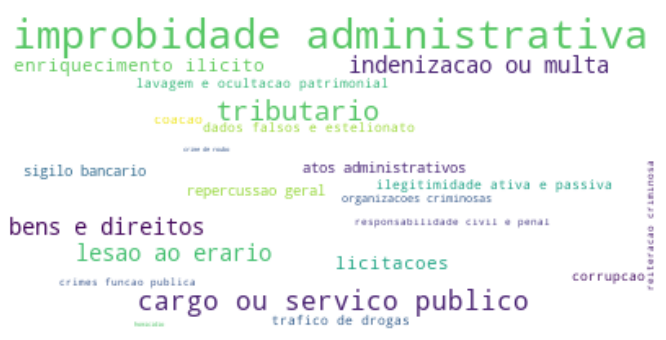

In [ ]:
dict_assunt = gera_dict_trm(assunt)
nuvem_palavras(dict_assunt)

insumo para analise de redes dos assuntos

In [ ]:
df_assunt = pd.DataFrame()
df_qtdade_assunt = pd.DataFrame()
assunt = []
f = 0
qtdade = []
for item in planilha["assuntos_2"]:
  item = re.sub(rgx,"", str(item))
  if len(item) > 0 and item != "NADA":
    f = f+1
    # print(item)
    itens = item.split(",")
    # print(len(itens))
    if len(itens) > 1:
      qtdade.append(len(itens))
      for it in itens:
        if it != "NADA":
          assunt.append(it.strip())
    else:
      qtdade.append(1)
      assunt.append(item.strip())
  else:
    qtdade.append(0)

planilha["qtdade_assuntos_2"] = qtdade
print(planilha["qtdade_assuntos_2"])

qtdade = []
for item in planilha["medidas_judiciais"]:
  item = re.sub(rgx,"", str(item))
  if len(item) > 0 and item != "NADA":
    f = f+1
    # print(item)
    itens = item.split(",")
    # print(len(itens))
    if len(itens) > 1:
      qtdade.append(len(itens))
      for it in itens:
        if it != "NADA":
          assunt.append(it.strip())
    else:
      qtdade.append(1)
      assunt.append(item.strip())
  else:
    qtdade.append(0)

planilha["qtdade_medidas"] = qtdade
print(planilha["qtdade_medidas"])


0        4
1        0
2        2
3        0
4        4
        ..
45879    0
45880    4
45881    3
45882    1
45883    1
Name: qtdade_assuntos_2, Length: 45884, dtype: int64
0        0
1        0
2        1
3        0
4        1
        ..
45879    0
45880    0
45881    1
45882    1
45883    0
Name: qtdade_medidas, Length: 45884, dtype: int64


In [ ]:
df_filter_3 = planilha["qtdade_assuntos_2"] > 1
planilha_nos_assunt_b = planilha[df_filter_3]

print(len(planilha_nos_assunt_b))

lista_nos, lista_unicos,ids = gera_nos(planilha_nos_assunt_b["assuntos_2"])


# lista_nos.to_csv("lista_nos_assuntos.csv", index= False, encoding= 'utf-8')
# files.download('lista_nos_assuntos.csv')


relacoes_inst = gera_relacoes(lista_unicos, ids, planilha_nos_assunt_b["assuntos_2"])


# relacoes_inst.to_csv("relacoes_assuntos.csv", index= False)
# files.download("relacoes_assuntos.csv")

12437
                              Label  Id
0        improbidade administrativa   0
1            enriquecimento ilicito   1
2          cargo ou servico publico   2
3                   lesao ao erario   3
4                            coacao   4
5                 trafico de drogas   5
6              indenizacao ou multa   6
7   lavagem e ocultacao patrimonial   7
8                        tributario   8
9                        licitacoes   9
10          organizacoes criminosas  10
11                  bens e direitos  11
12                  sigilo bancario  12
13    ilegitimidade ativa e passiva  13
14                   crime de roubo  14
15                        corrupcao  15
16   responsabilidade civil e penal  16
17                repercussao geral  17
18       dados falsos e estelionato  18
19            crimes funcao publica  19
20                        homicidio  20
21             reiteracao criminosa  21
22             atos administrativos  22
23               crimes de transit

relaçoes entre assuntos e medidas - abortado

In [ ]:
# eliminado

df_filter_3 = planilha["qtdade_assuntos_2"] > 0
planilha_nos_assunt_b = planilha[df_filter_3]

# print(planilha_nos_org_b)

df_filter_4 = planilha_nos_assunt_b["qtdade_medidas"] > 0
planilha_nos_medidas_b = planilha_nos_assunt_b[df_filter_4]

# filtradas as planilhas agora preciso juntar as strings das duas variáveis

planilha_nos_medidas_b["unif_org_inst"] = planilha_nos_medidas_b["assuntos_2"].astype(str)+"___"+planilha_nos_medidas_b["medidas_judiciais"].astype(str)

planilha_nos_medidas_b["unif_org_inst"] = planilha_nos_medidas_b["unif_org_inst"].astype(str).str.replace("\]___\[", ",").str.strip()

planilha_nos_medidas_b["unif_org_inst"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


2        ['coacao', 'trafico de drogas','prisao prevent...
4        ['improbidade administrativa', 'indenizacao ou...
6        ['improbidade administrativa', 'lavagem e ocul...
13       ['organizacoes criminosas', 'bens e direitos',...
16       ['licitacoes', 'bens e direitos',' medida limi...
                               ...                        
45876      ['improbidade administrativa','interrogatorio']
45877    ['improbidade administrativa', 'lesao ao erari...
45878    ['improbidade administrativa', 'enriquecimento...
45881    ['improbidade administrativa', 'licitacoes', '...
45882            ['atos administrativos','interrogatorio']
Name: unif_org_inst, Length: 7277, dtype: object

In [ ]:
# eliminado

lista_nos, lista_unicos,ids = gera_nos(planilha_nos_medidas_b["unif_org_inst"])


lista_nos.to_csv("lista_nos_medidas_assunt.csv", index= False, encoding= 'utf-8')
files.download('lista_nos_medidas_assunt.csv')


relacoes_inst = gera_relacoes(lista_unicos, ids, planilha_nos_medidas_b["unif_org_inst"])


relacoes_inst.to_csv("relacoes_medidas_assun.csv", index= False)
files.download("relacoes_medidas_assun.csv")

                         Label  Id
0                       coacao   0
1            trafico de drogas   1
2            prisao preventiva   2
3   improbidade administrativa   3
4         indenizacao ou multa   4
..                         ...  ..
66           suspensao da acao  66
67                    divorcio  67
68      apreensao em alienacao  68
69          crimes de transito  69
70           penhora avaliacao  70

[71 rows x 2 columns]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

      index                                      unif_org_inst
0         2  ['coacao', 'trafico de drogas','prisao prevent...
1         4  ['improbidade administrativa', 'indenizacao ou...
2         6  ['improbidade administrativa', 'lavagem e ocul...
3        13  ['organizacoes criminosas', 'bens e direitos',...
4        16  ['licitacoes', 'bens e direitos',' medida limi...
...     ...                                                ...
7272  45876    ['improbidade administrativa','interrogatorio']
7273  45877  ['improbidade administrativa', 'lesao ao erari...
7274  45878  ['improbidade administrativa', 'enriquecimento...
7275  45881  ['improbidade administrativa', 'licitacoes', '...
7276  45882          ['atos administrativos','interrogatorio']

[7277 rows x 2 columns]

{'coacao': 0, 'trafico de drogas': 1, 'prisao preventiva': 2, 'improbidade administrativa': 3, 'indenizacao ou multa': 4, 'lesao ao erario': 5, 'cargo ou servico publico': 6, 'antecipacao da tutela': 7, 'lavagem e ocul

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>